<a href="https://colab.research.google.com/github/jtsu03/CPIForecaster/blob/main/cpiforcaster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install prophet

In [ ]:
pip install fredapi

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import fredapi as fd
import plotly.express as px

In [ ]:
fred=fd.Fred(api_key='c07b88a0c6e040c8f8ab82885c98d6c7')

In [ ]:
data=fred.search('Consumer Price Index for All Urban Consumers: All Items in U.S. City Average')
data.head(10)

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
CPIAUCSL,CPIAUCSL,2024-04-22,2024-04-22,Consumer Price Index for All Urban Consumers: ...,1947-01-01,2024-03-01,Monthly,M,Index 1982-1984=100,Index 1982-1984=100,Seasonally Adjusted,SA,2024-04-10 07:49:03-05:00,95,The Consumer Price Index for All Urban Consume...
CPIAUCNS,CPIAUCNS,2024-04-22,2024-04-22,Consumer Price Index for All Urban Consumers: ...,1913-01-01,2024-03-01,Monthly,M,Index 1982-1984=100,Index 1982-1984=100,Not Seasonally Adjusted,NSA,2024-04-10 07:49:07-05:00,73,Handbook of Methods (https://www.bls.gov/opub/...
CUUS0000SA0,CUUS0000SA0,2024-04-22,2024-04-22,Consumer Price Index for All Urban Consumers: ...,1984-01-01,2023-07-01,Semiannual,SA,Index 1982-1984=100,Index 1982-1984=100,Not Seasonally Adjusted,NSA,2024-01-11 07:40:07-06:00,46,None
CPILFESL,CPILFESL,2024-04-22,2024-04-22,Consumer Price Index for All Urban Consumers: ...,1957-01-01,2024-03-01,Monthly,M,Index 1982-1984=100,Index 1982-1984=100,Seasonally Adjusted,SA,2024-04-10 07:49:03-05:00,82,"The ""Consumer Price Index for All Urban Consum..."
CPILFENS,CPILFENS,2024-04-22,2024-04-22,Consumer Price Index for All Urban Consumers: ...,1957-01-01,2024-03-01,Monthly,M,Index 1982-1984=100,Index 1982-1984=100,Not Seasonally Adjusted,NSA,2024-04-10 07:49:15-05:00,53,The “Consumer Price Index for All Urban Consum...
CUUS0000SA0L1E,CUUS0000SA0L1E,2024-04-22,2024-04-22,Consumer Price Index for All Urban Consumers: ...,1984-01-01,2023-07-01,Semiannual,SA,Index 1982-1984=100,Index 1982-1984=100,Not Seasonally Adjusted,NSA,2024-01-11 07:40:13-06:00,10,None
APU0000708111,APU0000708111,2024-04-22,2024-04-22,"Average Price: Eggs, Grade A, Large (Cost per ...",1980-01-01,2024-03-01,Monthly,M,U.S. Dollars,U.S. $,Not Seasonally Adjusted,NSA,2024-04-10 07:36:03-05:00,76,"Large white, Grade A chicken eggs, sold in a c..."
APU0000703112,APU0000703112,2024-04-22,2024-04-22,"Average Price: Ground Beef, 100% Beef (Cost pe...",1984-01-01,2024-03-01,Monthly,M,U.S. Dollars,U.S. $,Not Seasonally Adjusted,NSA,2024-04-10 07:36:03-05:00,68,Fresh regular 100% ground beef excluding round...
APU0000702111,APU0000702111,2024-04-22,2024-04-22,"Average Price: Bread, White, Pan (Cost per Pou...",1980-01-01,2024-03-01,Monthly,M,U.S. Dollars,U.S. $,Not Seasonally Adjusted,NSA,2024-04-10 07:36:04-05:00,68,All white pre-packaged regular bread regardles...


In [ ]:
data['title'][0]

'Consumer Price Index for All Urban Consumers: All Items in U.S. City Average'

In [ ]:
cpi=fred.get_series('CPIAUCSL')
cpi.name='values'
cpi

1947-01-01     21.480
1947-02-01     21.620
1947-03-01     22.000
1947-04-01     22.000
1947-05-01     21.950
               ...   
2023-11-01    308.024
2023-12-01    308.742
2024-01-01    309.685
2024-02-01    311.054
2024-03-01    312.230
Name: values, Length: 927, dtype: float64

In [ ]:
df=pd.DataFrame(cpi).reset_index()
df

,index,values
0,1947-01-01,21.480
1,1947-02-01,21.620
2,1947-03-01,22.000
3,1947-04-01,22.000
4,1947-05-01,21.950
...,...,...
922,2023-11-01,308.024
923,2023-12-01,308.742
924,2024-01-01,309.685
925,2024-02-01,311.054


In [ ]:
df2=df[df['index']>'1989-12-01']
df2

,index,values
516,1990-01-01,127.500
517,1990-02-01,128.000
518,1990-03-01,128.600
519,1990-04-01,128.900
520,1990-05-01,129.100
...,...,...
922,2023-11-01,308.024
923,2023-12-01,308.742
924,2024-01-01,309.685
925,2024-02-01,311.054


In [ ]:
fig=px.line(df2, x='index', y='values', title='CPI Avg. 1990-2024')
fig.show()

In [ ]:
df2 = df2.rename(columns={'index':'ds', 'values':'y'})

In [ ]:
from prophet import Prophet

In [ ]:
ml=Prophet()
ml.fit(df2)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpflxuoj7y/dbs2z2uz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpflxuoj7y/0_pmp38y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71152', 'data', 'file=/tmp/tmpflxuoj7y/dbs2z2uz.json', 'init=/tmp/tmpflxuoj7y/0_pmp38y.json', 'output', 'file=/tmp/tmpflxuoj7y/prophet_modelyz6al68b/prophet_model-20240422161933.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:19:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:19:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = ml.make_future_dataframe(periods = 10, freq = 'MS')

In [ ]:
future.tail()

,ds
416,2024-09-01
417,2024-10-01
418,2024-11-01
419,2024-12-01
420,2025-01-01


In [ ]:
result = ml.predict(future)
result[['ds', 'yhat','yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,1990-01-01,129.535431,125.663169,133.662562
1,1990-02-01,130.072713,126.079932,134.299022
2,1990-03-01,130.300376,125.954325,134.396940
3,1990-04-01,130.646877,125.978071,134.910210
4,1990-05-01,131.003350,126.999824,135.513093
...,...,...,...,...
416,2024-09-01,310.185396,306.252460,314.324251
417,2024-10-01,310.939377,307.097589,314.789150
418,2024-11-01,311.331825,307.154963,315.285008
419,2024-12-01,311.940377,307.678657,315.897738


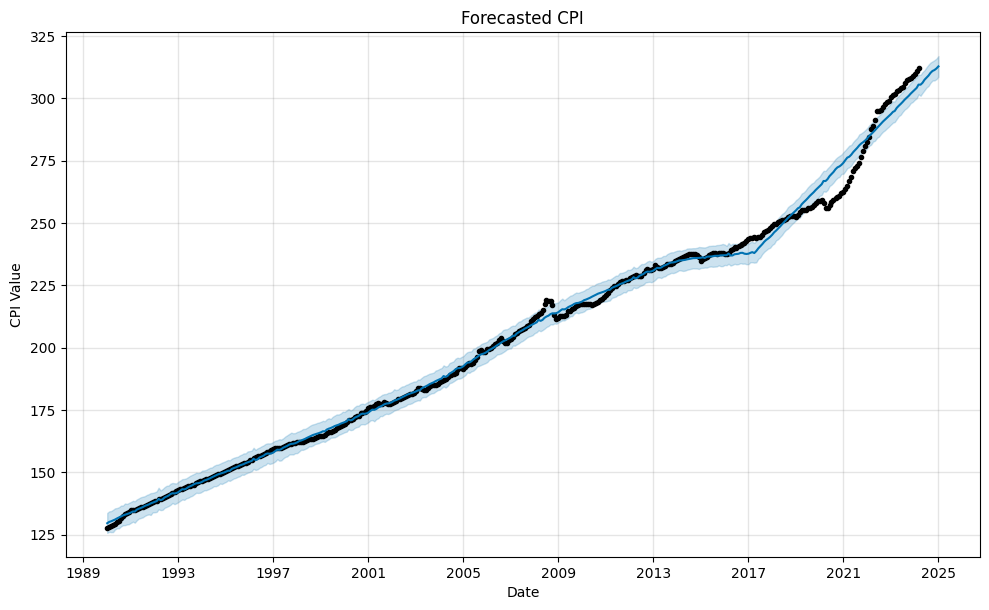

In [ ]:
fig=ml.plot(result)
plt.xlabel("Date")
plt.ylabel("CPI Value")
plt.title("Forecasted CPI")

plt.show()

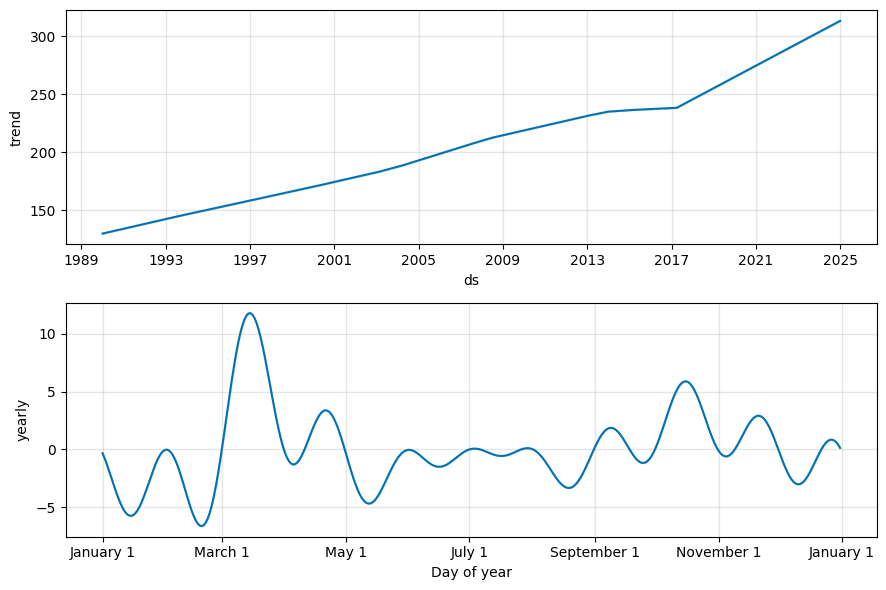

In [ ]:
fig2=ml.plot_components(result)

In [ ]:
from prophet.diagnostics import cross_validation,performance_metrics

In [ ]:
cv_results = cross_validation(model=ml, initial=pd.to_timedelta(30*20, unit='D'), period=pd.to_timedelta(30*5, unit='D'), horizon=pd.to_timedelta(30*12, unit='D'))

df_p=performance_metrics(cv_results)

INFO:prophet:Making 77 forecasts with cutoffs between 1991-12-20 00:00:00 and 2023-03-07 00:00:00


  0%|          | 0/77 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 18.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpflxuoj7y/6m6kn_ml.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpflxuoj7y/136fmyfj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31896', 'data', 'file=/tmp/tmpflxuoj7y/6m6kn_ml.json', 'init=/tmp/tmpflxuoj7y/136fmyfj.json', 'output', 'file=/tmp/tmpflxuoj7y/prophet_modelcs5rh4i6/prophet_model-20240422162850.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
16:28:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:29:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:n_changepoints greater than number of observations. Using 22.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpflxuoj7y/t4ojj4lc.json
DEBUG:cmdstanpy:input tempfi

In [ ]:
df_p

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,37 days,14.430174,3.798707,2.083896,0.008720,0.006007,0.008780,0.219780
1,38 days,14.599432,3.820920,2.116783,0.008873,0.006007,0.008934,0.236264
2,39 days,14.663252,3.829263,2.134270,0.008956,0.006158,0.009018,0.219780
3,40 days,14.650601,3.827610,2.133385,0.008957,0.006158,0.009020,0.214286
4,41 days,15.140859,3.891126,2.198375,0.009247,0.006158,0.009303,0.219780
...,...,...,...,...,...,...,...,...
319,356 days,52.881231,7.271948,4.233170,0.017214,0.011589,0.017467,0.391941
320,357 days,48.402443,6.957186,4.092647,0.016802,0.012734,0.017031,0.384615
321,358 days,51.709887,7.190959,4.257494,0.017319,0.013191,0.017569,0.384615
322,359 days,45.733564,6.762660,4.070476,0.016798,0.013427,0.017014,0.373626


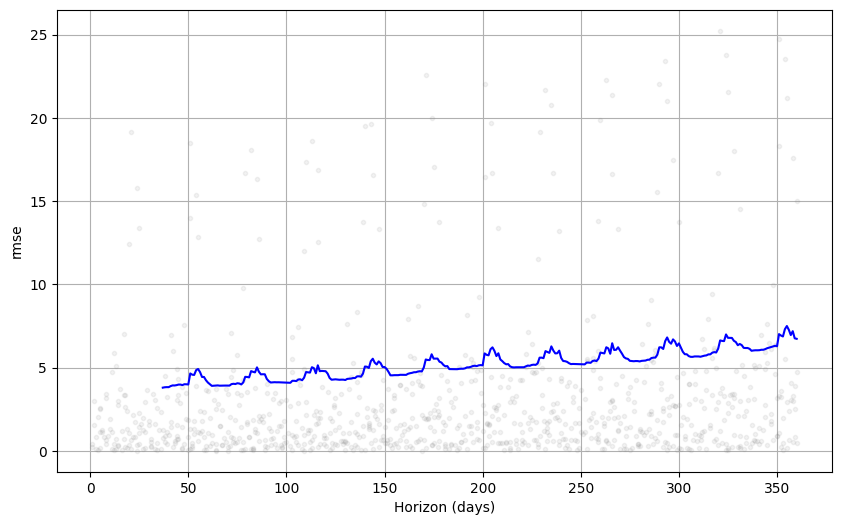

In [ ]:
from prophet.plot import plot_cross_validation_metric

fig=plot_cross_validation_metric(cv_results,metric='rmse')

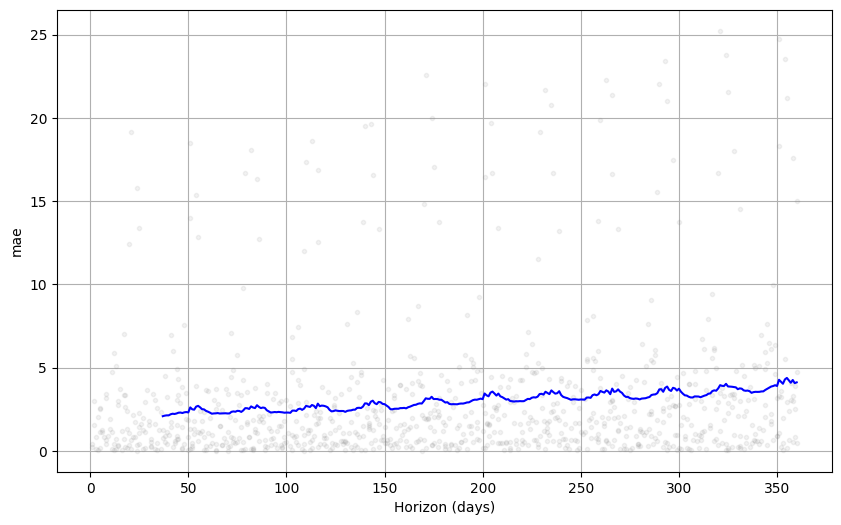

In [ ]:
fig=plot_cross_validation_metric(cv_results,metric='mae')